In [ ]:
from keras.datasets import mnist

In [ ]:
(x_train,y_train),(x_test,y_test)=mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [ ]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(60000, 28, 28)
(10000, 28, 28)
(60000,)
(10000,)


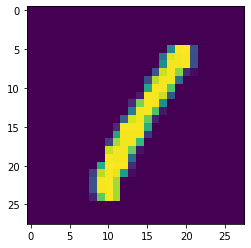

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(x_train[3])

In [ ]:
#obtain input image row and column lengths
input_img_row = x_train[0].shape[0]
input_img_col = x_train[0].shape[1]
print(input_img_row)
print(input_img_col)

28
28


In [ ]:
#convert input image into one dimension vector
x_train=x_train.reshape(x_train.shape[0],input_img_row,input_img_col,1)
x_test=x_test.reshape(x_test.shape[0],input_img_row,input_img_col,1)
print(x_test.shape)

(10000, 28, 28, 1)


In [ ]:
input_shape=(input_img_row,input_img_col,1)
x_train=x_train.astype("float32")
x_test=x_test.astype("float32")

In [ ]:
#normalize the data
x_train=x_train/255
x_test=x_test/255

In [ ]:
from keras.utils import np_utils
num_classes=10
y_train = np_utils.to_categorical(y_train, num_classes)
y_test = np_utils.to_categorical(y_test, num_classes)

In [ ]:
print(y_train.shape)

(60000, 10)


In [ ]:
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten
from keras.layers import Conv2D,MaxPool2D
from keras.optimizers import SGD


In [ ]:
model=Sequential()

In [ ]:
model.add(Conv2D(filters=32,kernel_size=(3,3),activation="relu",input_shape=(28,28,1)))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(filters=64,kernel_size=(3,3),activation="relu"))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(units=128,activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(num_classes,activation='softmax'))

In [ ]:
model.compile(optimizer=SGD(0.01),loss="categorical_crossentropy",metrics=["accuracy"])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
dropout (Dropout)            (None, 5, 5, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1600)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               2

In [ ]:
train = model.fit(x_train,y_train,batch_size = 35,epochs =2,verbose = 'auto',validation_data = (x_test,y_test))

Epoch 1/2
1715/1715 [==============================] - 75s 34ms/step - loss: 1.4827 - accuracy: 0.4859 - val_loss: 0.1948 - val_accuracy: 0.9446
Epoch 2/2
1715/1715 [==============================] - 58s 34ms/step - loss: 0.3172 - accuracy: 0.9044 - val_loss: 0.1201 - val_accuracy: 0.9652


In [ ]:
score = model.evaluate(x_test,y_test,verbose = 'auto')
print('Test loss : ',score[0])
print('accuracy :',score[1])

Test loss :  0.12014443427324295
accuracy : 0.9652000069618225


In [ ]:
#saving the model.....it will be saved in 
model.save("cnn_model1")
from keras.models import load_model
loaded_model=load_model("cnn_model1")
score=loaded_model.evaluate(x_test, y_test, verbose=0)
print('Test loss:',score[0])
print('Test accuracy:',score[1])

INFO:tensorflow:Assets written to: cnn_model1/assets
Test loss: 0.12014443427324295
Test accuracy: 0.9652000069618225


/usr/local/lib/python3.7/dist-packages/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


[7]


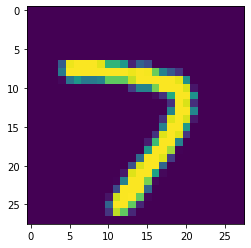

In [ ]:
input_image=x_test[17]
input_image=input_image.reshape(1,28,28,1)
results=str(loaded_model.predict_classes(input_image,batch_size=1,verbose=0))
print(results)
x1=x_test[17].reshape(28,28)
plt.imshow(x1)